# Introduction to GeoPandas
http://geopandas.org/

This notebook wades gently into the world of GeoPandas and also serves as a review of several Pandas operations. Specifically we examine the following:
* Importing the package
* Reading & writing shapefiles into a GeoPandas dataFrame
* Exploring the GeoPandas dataFrame
 * Exposing the number of features 
 * Revealing the data types of each column 
 * Exploring the `geometry` data type
* Quick view of plotting in GeoPandas
* Quick view of geoprocessing in GeoPandas

## Installing the package and enabling plots to show in the notebook

In [1]:
#import the package
import geopandas as gpd

In [2]:
#enable plots to appear in the notebook
%matplotlib inline

## Constructing a GeoPandas DataFrame from a Shapefile and exploring it
GeoPandas can read shapefiles directly. Behind the scenes, this operation is using the `GDAL` package which contains the binaries capable of understanding geospatial data, the `fiona` package, which allows Python to interact nicely with `GDAL` libraries, and the `shapely` package which has functions for operating with feature classes in a Pythonic way. 

In [3]:
#read in the HUC12.shp feature class
gdf = gpd.read_file('../Data/HUC12.shp')

In [4]:
#How many features in the dataset?
len(gdf)

210

In [5]:
#show the data types in this dataset
gdf.dtypes

OBJECTID_2      int64
OBJECTID        int64
HUC_8          object
HUC_10         object
HUC_12         object
ACRES         float64
NCONTRB_A     float64
HU_10_GNIS     object
HU_12_GNIS     object
HU_10_DS       object
HU_10_NAME     object
HU_10_MOD      object
HU_10_TYPE     object
HU_12_DS       object
HU_12_NAME     object
HU_12_MOD      object
HU_12_TYPE     object
META_ID        object
STATES         object
GlobalID       object
SHAPE_Leng    float64
GAZ_ID          int64
WBD_Date       object
VPUID          object
Shape_Le_1    float64
Shape_STAr    float64
Shape_STLe    float64
geometry       object
dtype: object

In [6]:
#examine the attributes for the first feature
gdf.iloc[0]

OBJECTID_2                                                80221
OBJECTID                                                  58735
HUC_8                                                  03040103
HUC_10                                               0304010305
HUC_12                                             030401030503
ACRES                                                     15414
NCONTRB_A                                                     0
HU_10_GNIS                                                 None
HU_12_GNIS                                                 None
HU_10_DS                                             0304010306
HU_10_NAME                                 Lower Uwharrie River
HU_10_MOD                                                    NM
HU_10_TYPE                                                    S
HU_12_DS                                           030401030504
HU_12_NAME                                         Barnes Creek
HU_12_MOD                               

## Exploring the `geometry` objects in a GeoPandas dataframe
The key to Geopandas ability to work with geospatial data is by adding a new data type to the standard Pandas dataFrame: this is stored in the `geometry` field. 

Let's explore this field. 

In [7]:
#show the first 5 values in the geometry field
gdf['geometry'][0:5]

0    POLYGON ((-79.88965123981285 35.47995405243762...
1    POLYGON ((-80.06735036572678 35.56027136313293...
2    POLYGON ((-80.36849110927722 35.9302859922048,...
3    POLYGON ((-80.44931667272624 35.93854580294652...
4    POLYGON ((-80.32812167487538 34.87717135967057...
Name: geometry, dtype: object

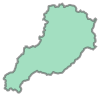

In [8]:
#show just the first value
gdf['geometry'][0]

## Plotting capability of the GeoPandas dataFrame object

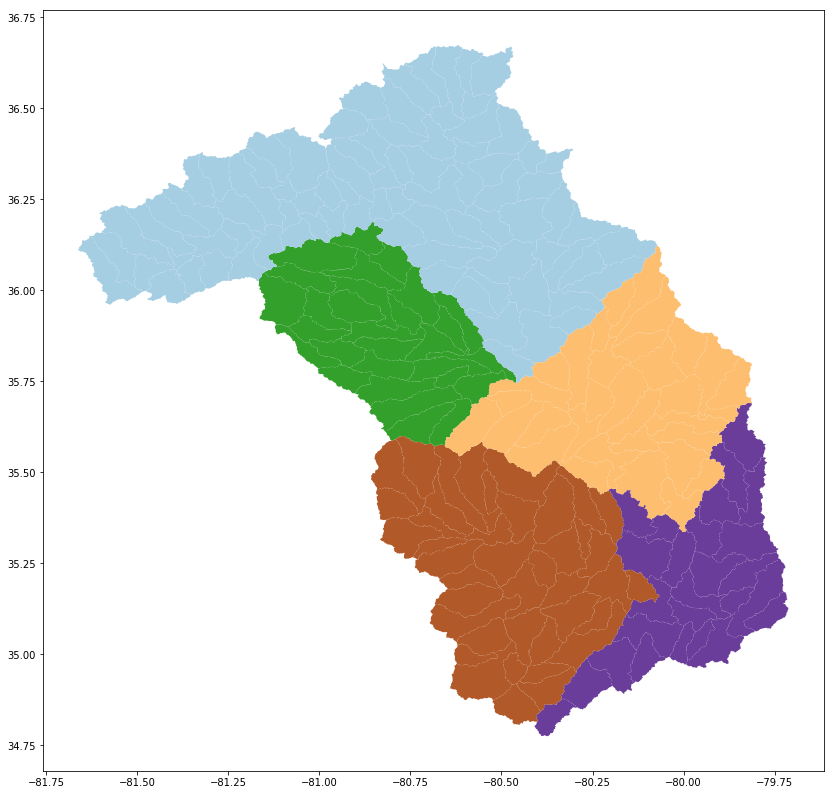

In [9]:
#Plotting - http://geopandas.org/mapping.html
gdf.plot(column='HUC_8',
         cmap='Paired',
         categorical=True,
         figsize=(14,18)
        );

## Geospatial capabilities of the GeoPandas dataFrame object

In [10]:
#Dissolving
dfHUC8 = gdf.dissolve(by='HUC_8',aggfunc='sum')
dfHUC8.dtypes

geometry       object
OBJECTID_2      int64
OBJECTID        int64
ACRES         float64
NCONTRB_A     float64
SHAPE_Leng    float64
GAZ_ID          int64
Shape_Le_1    float64
Shape_STAr    float64
Shape_STLe    float64
dtype: object

C:\Users\jpfay\AppData\Local\ESRI\conda\envs\my_env\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


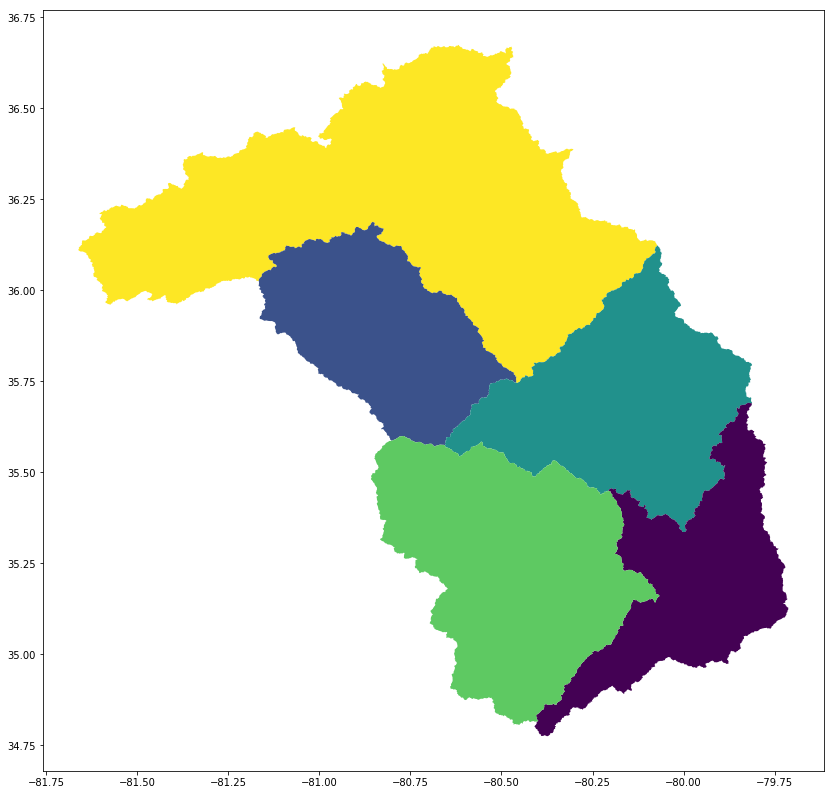

In [11]:
dfHUC8.plot(column='ACRES',
            scheme='quantiles',        
            figsize=(14,18));

## Recap
In this super quick introduction to GeoPandas, we saw that the GeoDataFrame is easy to construct from a shapefile, and once constructed gives us access to the analytic capability of Pandas dataframes (e.g. selecting, summarizing, etc.) as well as plotting and spatial analytic capability. 

I'm hopeful that at the end of this short introduction you're eager to read up on the documentation and learn more what GeoPandas can do. 